### Check the change in slab deformation in Sumatra and Java before and after 2004 Mega event

Observation: Number of earthquakes in Java slab at depth > 70 km increased drastically almost ~2 years before the ME in Sumatra

In [1587]:
import pandas as pd
import numpy as np
from numpy import diff

from scipy.stats import ttest_ind

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import ternary # ternary plot has a bug
import plotly.express as px
import h5py
import matplotlib as mpl

# import geopandas as gpd
import math

from matplotlib.patches import Circle, Wedge, Polygon

import os
import matplotlib.patheffects as path_effects


from netCDF4 import Dataset as NetCDFFile 

# for beachball - there are some error with using obspy
from pyrocko.plot import beachball
from pyrocko import moment_tensor as ptm

import cartopy.crs as ccrs
import cartopy.mpl.geoaxes

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from pathlib import Path
%matplotlib inline

import harmonica as hm

from obspy.core import UTCDateTime

from datetime import datetime, timezone

import seaborn as sns
sns.set()
sns.set_style(style='white') 
sns.set_style("ticks", {"xtick.major.size": 0.5, "ytick.major.size": 0.5})


#set the font globally
plt.rcParams.update({'font.family':'Helvetica'})

In [1588]:
# data = pd.read_csv('sum_with_2005_eqs.csv', header = 'infer')
data = pd.read_csv("/Users/mohd0001/PhD_Monash/Paper2/time-series/data/SUeq_data.csv", header = 'infer')
# data.dtypes

In [1589]:
# data = data[(data['MW'] >= 5.1)]

data.sort_values(by = 'MW', ascending = False, inplace = True)

data['DATE'] = pd.to_datetime(data['DATE']) # change dtype to datetime format
data['DATE'] = data['DATE'].dt.strftime('%Y-%m-%d') # change dtype to object

# data['DATE'] and data['TIME'] should be object (str) to perform + operator

data_dummy = np.array(data['DATE'] + ' ' + data['TIME'])

data_ev_time = []

for val in data_dummy:
    data_ev_time.append(UTCDateTime(val))

    
ref_date = data_ev_time[0]

data_ev_time = np.array(data_ev_time)

date = []

for val in data_ev_time:
    date.append(val - ref_date)
    
date = np.array(date) # this is in seconds

data['YEARS'] = date/31536000

data = data.sort_values(by ='YEARS', ascending=True) # this is an important step
# data = data[(data['DATE'] > '01-01-2003') & (data['DATE'] < '26-11-2004')]

In [1590]:
# data[data["TYPE"] == 'O_THRUST']

## Long Slab (> 70 km)

In [1591]:
data_dgoing = data.loc[data['CLASS'] == 'DGOING']
data_dgoing = data_dgoing[(data_dgoing['LAT'] <= -2) & (data_dgoing['LON'] <= 120)]
data_dgoing = data_dgoing[(data_dgoing['DEPTH'] > 70)]

# data_dgoing = data_dgoing[(data_dgoing['YEARS'] < 1) & (data_dgoing['YEARS'] > -1)]
# data_dgoing = data_dgoing[(data_dgoing['YEARS'] < 5) & (data_dgoing['YEARS'] > -5)]
# data_dgoing = data_dgoing[(data_dgoing['YEARS'] < 2) & (data_dgoing['YEARS'] > -2)]

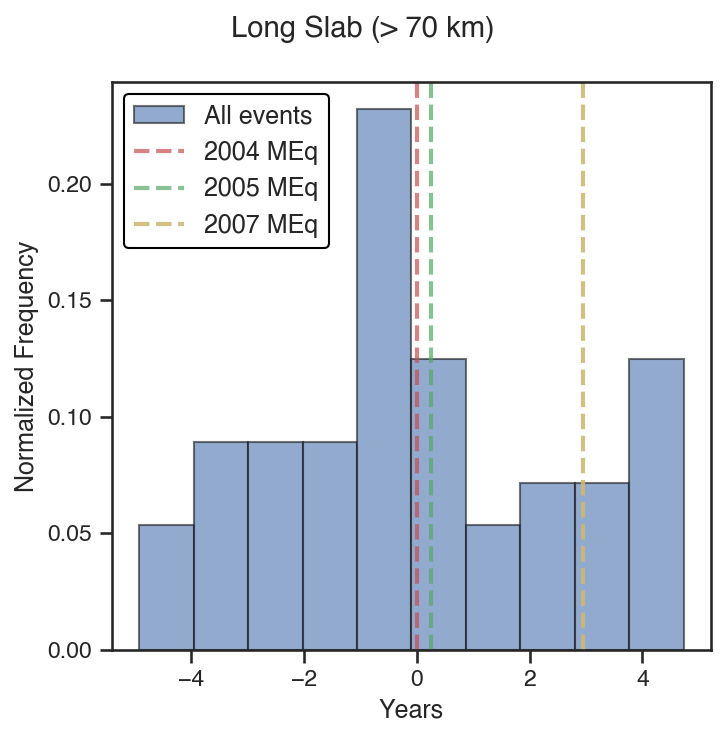

In [1592]:
figsize = (5,5)
dpi=150
width = 1

fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= False)
fig1=ax


# Plot the top figure (years vs count)

# Group the thrust earthquakes by year and count the number of earthquakes on each date
all_dgoing = data_dgoing.groupby('YEARS').size()
# Normalize the thrust earthquake counts by dividing by the total number of earthquakes
normalized_all_dgoing = all_dgoing / all_dgoing.sum()

bins = 10
alpha = 0.6

# plot normal earthquake
fig1.hist(all_dgoing.index, bins=bins, weights=all_dgoing.values,
          edgecolor='k', lw=1, alpha=alpha, color='b', label='All events')

fig1.legend(loc = 'upper left',
            fontsize = 10,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=1)

fig1.set_xlabel('Years')
fig1.set_ylabel('EQ count')
fig1.axvline(x= 0, color="r", lw=2, ls='--', alpha=0.7, label='2004 MEq') #2004 MEq
fig1.axvline(x= 0.252502, color="g", lw=2, ls='--', alpha=0.7, label='2005 MEq') #2005 MEq
fig1.axvline(x= 2.953983, color="y", lw=2, ls='--', alpha=0.9, label='2007 MEq') #2007 MEq


fig1.legend(loc = 'upper left',
            fontsize = 12,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=1)

#####################################################

# # Plot right figure

# # 2 yrs before 2004 event
# before_eq = data_dgoing[(data_dgoing['YEARS'] < 0) & (data_dgoing['YEARS'] > -2)]
# all_before = before_eq.groupby('MW').size()
# normalized_all_before = all_before / all_before.sum()

# # 2 yrs after 2004 event
# after_eq = data_dgoing[(data_dgoing['YEARS'] > 0) & (data_dgoing['YEARS'] < 2)]
# all_after = after_eq.groupby('MW').size()
# normalized_all_after = all_after / all_after.sum()

# # Plot earthquake magnitude data
# bins=20
# alpha = 0.8

# fig2.hist(normalized_all_before.index, bins=bins, weights=normalized_all_before.values,
#           edgecolor='black', lw=2.5, alpha=alpha, color='r', label='2 yrs before 2004 MEq')

# fig2.hist(normalized_all_after.index, bins=bins, weights=normalized_all_after.values,
#           edgecolor='black', lw=2.5, alpha=alpha, color='b', label='2 yrs after 2004 MEq')



# fig2.set_xlabel('Magnitude')
# # fig2.set_ylabel('Count')
# fig2.legend(loc = 'upper right',
#             fontsize = 10,
#             facecolor="white",
#             framealpha=1,
#             edgecolor="black",
#             markerscale=1)

fig.suptitle('Long Slab (> 70 km)', fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.9)


# fig1.set_xlim([-5, 5])
# fig1.set_ylim([0, 14])

# fig2.set_xlim([4.5, 7.5])
# fig2.set_ylim([0, 14])


plt.tight_layout()

# plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/hist/deepJava.png"
#             , dpi = 500, transparent= True, bbox_inches='tight')

In [1593]:
df = data[(data['MW'] > 7) & (data['YEARS'] >= -1) & (data['YEARS'] < 3)]
    
print(df[['LAT', 'LON', 'DEPTH', 'YEARS', 'MW', 'DATE', 'CLASS']])

        LAT      LON  DEPTH     YEARS   MW        DATE    CLASS
2223 -2.532  103.932  582.2 -0.422066  7.3  2004-07-25   DGOING
1426  3.299   95.876   28.6  0.000000  9.0  2004-12-26  MTHRUST
835   6.930   92.906   45.7  0.001815  7.2  2004-12-26  MTHRUST
2625  3.026   97.459   25.8  0.252502  8.6  2005-03-28  MTHRUST
893   7.890   92.117   18.8  0.575250  7.2  2005-07-24   DGOING
284  -9.293  107.373   29.7  1.557750  7.7  2006-07-17  MTHRUST
424  -5.917  107.423  295.0  2.616422  7.5  2007-08-08   DGOING
2169 -4.458  101.359   32.0  2.953983  8.5  2007-12-09  MTHRUST


## Long slab (< 70 km)

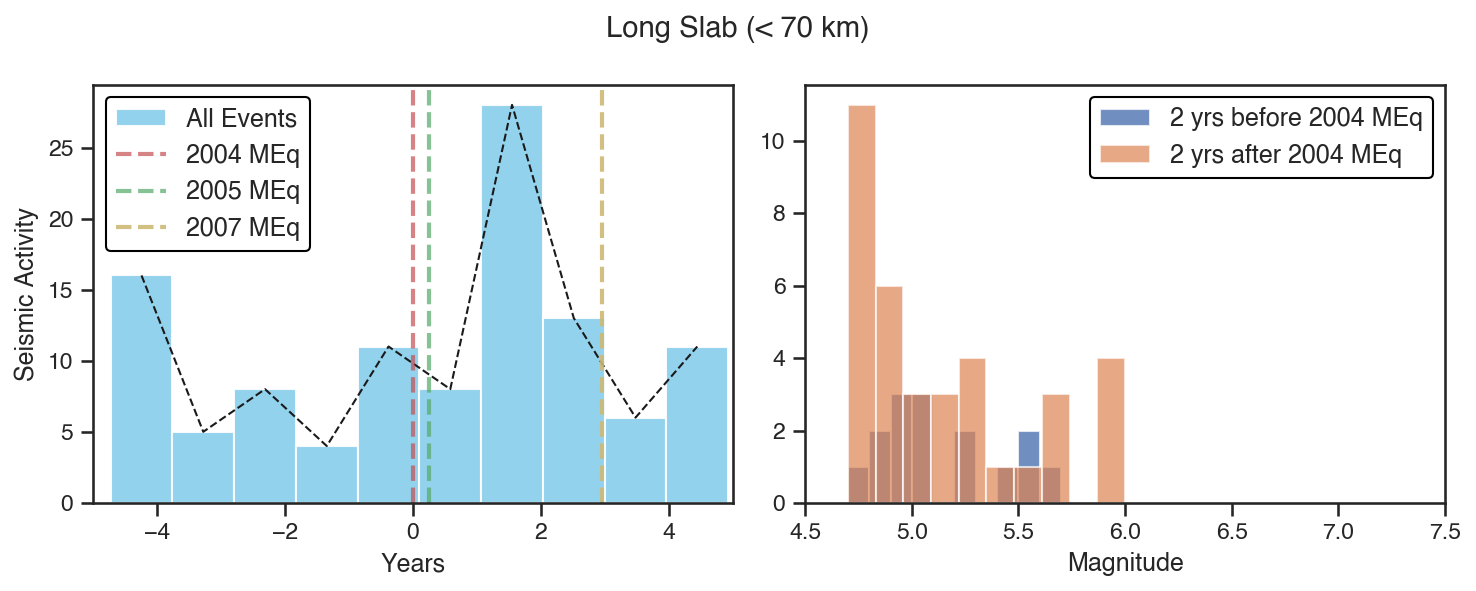

In [1594]:
data_dgoing = data.loc[data['CLASS'] == 'DGOING']
data_dgoing = data_dgoing[(data_dgoing['LAT'] <= -2) & (data_dgoing['LON'] <= 120)]
data_dgoing = data_dgoing[(data_dgoing['DEPTH'] < 70)]
# data_dgoing = data_dgoing[(data_dgoing['YEARS'] < 1) & (data_dgoing['YEARS'] > -1)]
data_dgoing = data_dgoing[(data_dgoing['YEARS'] < 5) & (data_dgoing['YEARS'] > -5)]

figsize = (10,4)
dpi=150
width = 1

fig, ax = plt.subplots(1, 2, dpi=dpi, figsize = figsize, sharex= False)
fig1=ax[0]
fig2=ax[1]

# Plot left figure
year = data_dgoing.YEARS
n, bins, _ = fig1.hist(year, bins=10, color='skyblue', alpha=0.9, label='All Events')

# Compute the middle points of each bin and plot the line that joins them
bin_centers = (bins[1:] + bins[:-1]) / 2
fig1.plot(bin_centers, n, 'k--', lw=1)
fig1.set_xlabel('Years')
fig1.set_ylabel('Seismic Activity')

fig1.axvline(x= 0, color="r", lw=2, ls='--', alpha=0.7, label='2004 MEq') #2004 MEq
fig1.axvline(x= 0.252502, color="g", lw=2, ls='--', alpha=0.7, label='2005 MEq') #2005 MEq
fig1.axvline(x= 2.953983, color="y", lw=2, ls='--', alpha=0.9, label='2007 MEq') #2007 MEq


fig1.legend(loc = 'upper left',
            fontsize = 12,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=1)

#####################################################

# Plot right figure

# before_eq = data_dgoing[(data_dgoing['YEARS'] < 0) & (data_dgoing['YEARS'] > -1)]
# after_eq = data_dgoing[(data_dgoing['YEARS'] > 0) & (data_dgoing['YEARS'] < 1)]

before_eq = data_dgoing[(data_dgoing['YEARS'] < 0) & (data_dgoing['YEARS'] > -2)]
after_eq = data_dgoing[(data_dgoing['YEARS'] > 0) & (data_dgoing['YEARS'] < 2)]

# before_eq = data_dgoing[(data_dgoing['YEARS'] < 0) & (data_dgoing['YEARS'] > -3)]
# after_eq = data_dgoing[(data_dgoing['YEARS'] > 0) & (data_dgoing['YEARS'] < 3)]

before_eq = before_eq.MW
after_eq = after_eq.MW

# Plot earthquake magnitude data
fig2.hist(before_eq, alpha=0.8, label='2 yrs before 2004 MEq')
fig2.hist(after_eq, alpha=0.7, label='2 yrs after 2004 MEq')

fig2.set_xlabel('Magnitude')
# fig2.set_ylabel('Count')
fig2.legend(loc = 'upper right',
            fontsize = 12,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=1)

fig.suptitle('Long Slab (< 70 km)', fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.9)


fig1.set_xlim([-5, 5])
# fig1.set_ylim([0, 6.5])

fig2.set_xlim([4.5, 7.5])
# fig2.set_ylim([0, 6.5])

plt.tight_layout()

plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/hist/shallowJava.png"
            , dpi = 500, transparent= True, bbox_inches='tight')

## Short slab (> 70 km)

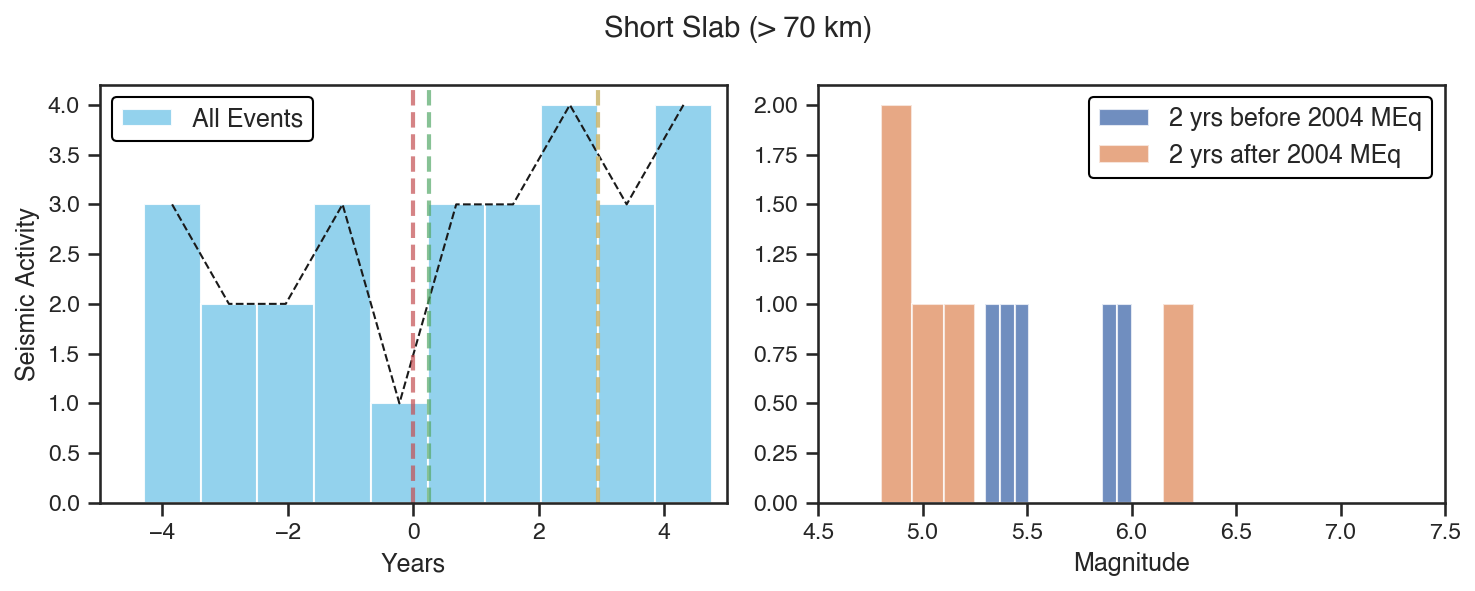

In [1595]:
data_dgoing = data.loc[data['CLASS'] == 'DGOING']
data_dgoing = data_dgoing[(data_dgoing['LAT'] <= 15) & (data_dgoing['LAT'] > -2)]
data_dgoing = data_dgoing[(data_dgoing['DEPTH'] > 70)]
# data_dgoing = data_dgoing[(data_dgoing['YEARS'] < 1) & (data_dgoing['YEARS'] > -1)]
data_dgoing = data_dgoing[(data_dgoing['YEARS'] < 5) & (data_dgoing['YEARS'] > -5)]

figsize = (10,4)
dpi=150
width = 1

fig, ax = plt.subplots(1, 2, dpi=dpi, figsize = figsize, sharex= False)
fig1=ax[0]
fig2=ax[1]

# Plot left figure
year = data_dgoing.YEARS
n, bins, _ = fig1.hist(year, bins=10, color='skyblue', alpha=0.9, label='All Events')

fig1.legend(loc = 'upper left',
            fontsize = 12,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=1)

# Compute the middle points of each bin and plot the line that joins them
bin_centers = (bins[1:] + bins[:-1]) / 2
fig1.plot(bin_centers, n, 'k--', lw=1)
fig1.set_xlabel('Years')
fig1.set_ylabel('Seismic Activity')

fig1.axvline(x= 0, color="r", lw=2, ls='--', alpha=0.7, label='2004 MEq') #2004 MEq
fig1.axvline(x= 0.252502, color="g", lw=2, ls='--', alpha=0.7, label='2005 MEq') #2005 MEq
fig1.axvline(x= 2.953983, color="y", lw=2, ls='--', alpha=0.9, label='2007 MEq') #2007 MEq

#####################################################

# Plot right figure

# before_eq = data_dgoing[(data_dgoing['YEARS'] < 0) & (data_dgoing['YEARS'] > -1)]
# after_eq = data_dgoing[(data_dgoing['YEARS'] > 0) & (data_dgoing['YEARS'] < 1)]

before_eq = data_dgoing[(data_dgoing['YEARS'] < 0) & (data_dgoing['YEARS'] > -2)]
after_eq = data_dgoing[(data_dgoing['YEARS'] > 0) & (data_dgoing['YEARS'] < 2)]

# before_eq = data_dgoing[(data_dgoing['YEARS'] < 0) & (data_dgoing['YEARS'] > -3)]
# after_eq = data_dgoing[(data_dgoing['YEARS'] > 0) & (data_dgoing['YEARS'] < 3)]

before_eq = before_eq.MW
after_eq = after_eq.MW

# Plot earthquake magnitude data
fig2.hist(before_eq, alpha=0.8, label='2 yrs before 2004 MEq')
fig2.hist(after_eq, alpha=0.7, label='2 yrs after 2004 MEq')

fig2.set_xlabel('Magnitude')
# fig2.set_ylabel('Count')
fig2.legend(loc = 'upper right',
            fontsize = 12,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=1)

fig.suptitle('Short Slab (> 70 km)', fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.9)


fig1.set_xlim([-5, 5])
# fig1.set_ylim([0, 3])

fig2.set_xlim([4.5, 7.5])
# fig2.set_ylim([0, 3])

plt.tight_layout()

plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/hist/deepAndSum.png"
            , dpi = 500, transparent= True, bbox_inches='tight')

## Short Slab (< 70 km)

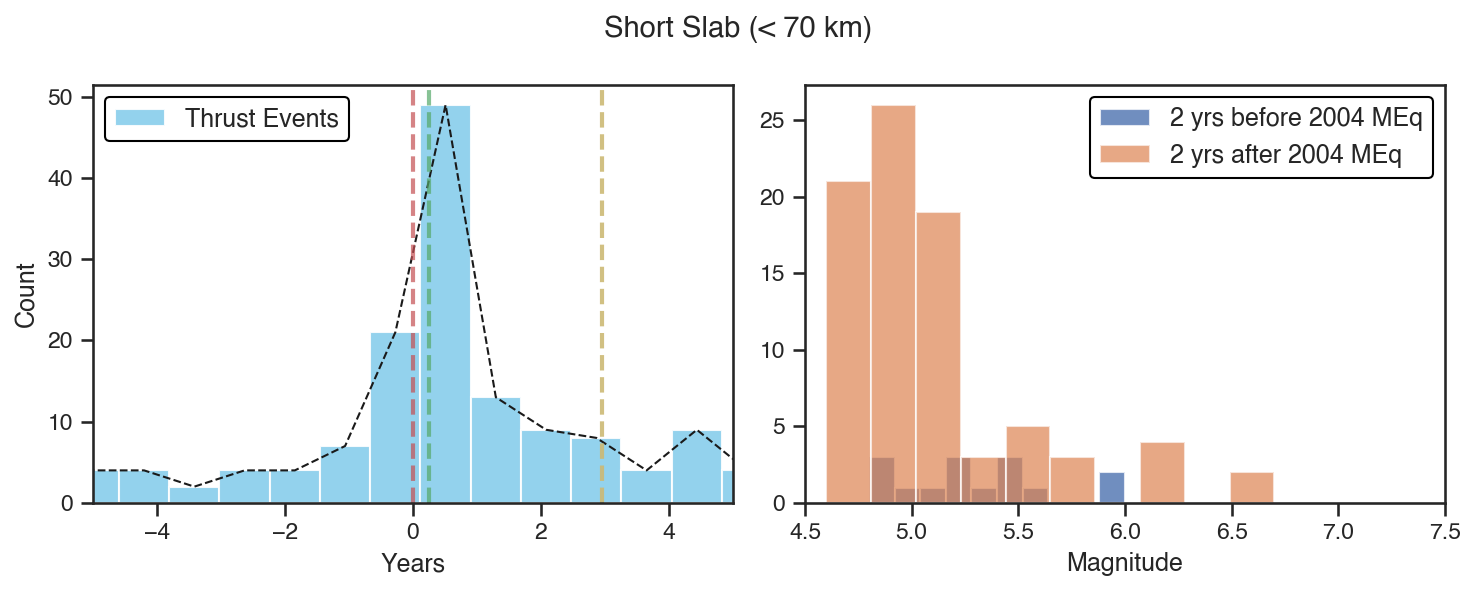

In [1596]:
data_dgoing = data.loc[data['CLASS'] == 'DGOING']
# data_dgoing = data_dgoing[(data_dgoing['TYPE'] == 'THRUST') & (data_dgoing['TYPE'] == 'O_THRUST')]

data_dgoing = data_dgoing[(data_dgoing['LAT'] <= 15) & (data_dgoing['LAT'] > -2) &
                         (data_dgoing['DEPTH'] < 70) &
                         (data_dgoing['YEARS'] < 5) & (data_dgoing['YEARS'] > -5) &
                         (data_dgoing['TYPE'] == 'THRUST') | (data_dgoing['TYPE'] == 'O_THRUST')]


# data_dgoing = data_dgoing[(data_dgoing['DEPTH'] < 70)]
# # data_dgoing = data_dgoing[(data_dgoing['YEARS'] < 1) & (data_dgoing['YEARS'] > -1)]
# data_dgoing = data_dgoing[(data_dgoing['YEARS'] < 5) & (data_dgoing['YEARS'] > -5)]

figsize = (10,4)
dpi=150
width = 1

fig, ax = plt.subplots(1, 2, dpi=dpi, figsize = figsize, sharex= False)
fig1=ax[0]
fig2=ax[1]

# Plot left figure
year = data_dgoing.YEARS
n, bins, _ = fig1.hist(year, bins=50, color='skyblue', alpha=0.9, label='Thrust Events')

fig1.legend(loc = 'upper left',
            fontsize = 12,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=1)

# Compute the middle points of each bin and plot the line that joins them
bin_centers = (bins[1:] + bins[:-1]) / 2
fig1.plot(bin_centers, n, 'k--', lw=1)
fig1.set_xlabel('Years')
fig1.set_ylabel('Count')

fig1.axvline(x= 0, color="r", lw=2, ls='--', alpha=0.7, label='2004 MEq') #2004 MEq
fig1.axvline(x= 0.252502, color="g", lw=2, ls='--', alpha=0.7, label='2005 MEq') #2005 MEq
fig1.axvline(x= 2.953983, color="y", lw=2, ls='--', alpha=0.9, label='2007 MEq') #2007 MEq

#####################################################

# Plot right figure

# before_eq = data_dgoing[(data_dgoing['YEARS'] < 0) & (data_dgoing['YEARS'] > -1)]
# after_eq = data_dgoing[(data_dgoing['YEARS'] > 0) & (data_dgoing['YEARS'] < 1)]

before_eq = data_dgoing[(data_dgoing['YEARS'] < 0) & (data_dgoing['YEARS'] > -2)]
after_eq = data_dgoing[(data_dgoing['YEARS'] > 0) & (data_dgoing['YEARS'] < 2)]

# before_eq = data_dgoing[(data_dgoing['YEARS'] < 0) & (data_dgoing['YEARS'] > -3)]
# after_eq = data_dgoing[(data_dgoing['YEARS'] > 0) & (data_dgoing['YEARS'] < 3)]

before_eq = before_eq.MW
after_eq = after_eq.MW

# Plot earthquake magnitude data
fig2.hist(before_eq, alpha=0.8, label='2 yrs before 2004 MEq')
fig2.hist(after_eq, alpha=0.7, label='2 yrs after 2004 MEq')

fig2.set_xlabel('Magnitude')
# fig2.set_ylabel('Count')
fig2.legend(loc = 'upper right',
            fontsize = 12,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=1)

fig.suptitle('Short Slab (< 70 km)', fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.9)


fig1.set_xlim([-5, 5])
fig2.set_xlim([4.5, 7.5])

plt.tight_layout()

# plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/hist/ThrustshallowAndSum.png"
#             , dpi = 500, transparent= True, bbox_inches='tight')

## Java Megathrust

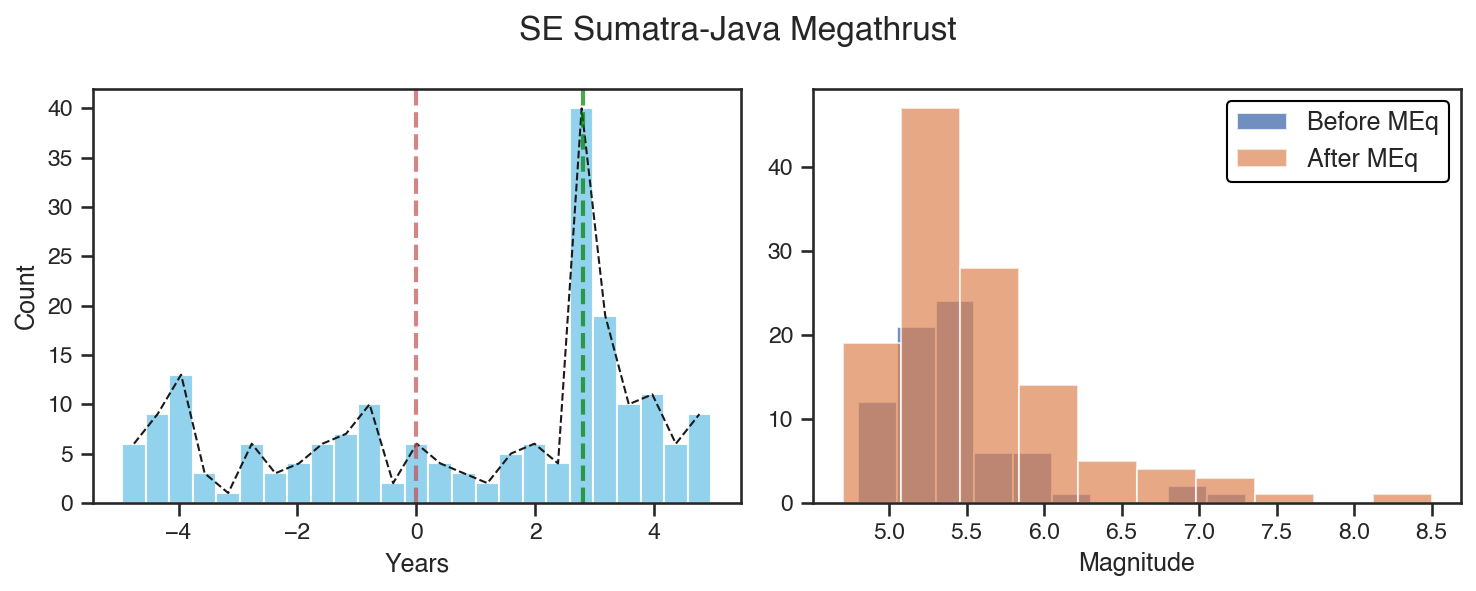

In [1597]:
data_dgoing = data.loc[data['CLASS'] == 'MTHRUST']
data_dgoing = data_dgoing[(data_dgoing['LAT'] <= -2) & (data_dgoing['LON'] <= 120)]
# data_dgoing = data_dgoing[(data_dgoing['DEPTH'] < 70)]
# data_dgoing = data_dgoing[(data_dgoing['YEARS'] < 1) & (data_dgoing['YEARS'] > -1)]
data_dgoing = data_dgoing[(data_dgoing['YEARS'] < 5) & (data_dgoing['YEARS'] > -5)]

figsize = (10,4)
dpi=150
width = 1

fig, ax = plt.subplots(1, 2, dpi=dpi, figsize = figsize, sharex= False)
fig1=ax[0]
fig2=ax[1]

# Plot left figure
year = data_dgoing.YEARS
n, bins, _ = fig1.hist(year, bins=25, color='skyblue', alpha=0.9)

# Compute the middle points of each bin and plot the line that joins them
bin_centers = (bins[1:] + bins[:-1]) / 2
fig1.plot(bin_centers, n, 'k--', lw=1)
fig1.set_xlabel('Years')
fig1.set_ylabel('Count')

fig1.axvline(x= 0, color="r", lw=2, ls='--', alpha=0.7) #2004 MEq
fig1.axvline(x=2.8, color='green', lw=2, ls='--', alpha=0.7) #2005 MEq

#####################################################

# Plot right figure

# before_eq = data_dgoing[(data_dgoing['YEARS'] < 0) & (data_dgoing['YEARS'] > -1)]
# after_eq = data_dgoing[(data_dgoing['YEARS'] > 0) & (data_dgoing['YEARS'] < 1)]

before_eq = data_dgoing[(data_dgoing['YEARS'] < 0) & (data_dgoing['YEARS'] > -5)]
after_eq = data_dgoing[(data_dgoing['YEARS'] > 0) & (data_dgoing['YEARS'] < 5)]

# before_eq = data_dgoing[(data_dgoing['YEARS'] < 0) & (data_dgoing['YEARS'] > -3)]
# after_eq = data_dgoing[(data_dgoing['YEARS'] > 0) & (data_dgoing['YEARS'] < 3)]

before_eq = before_eq.MW
after_eq = after_eq.MW

# Plot earthquake magnitude data
fig2.hist(before_eq, alpha=0.8, label='Before MEq')
fig2.hist(after_eq, alpha=0.7, label='After MEq')

fig2.set_xlabel('Magnitude')
# fig2.set_ylabel('Count')
fig2.legend(loc = 'upper right',
            fontsize = 12,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=1)

fig.suptitle('SE Sumatra-Java Megathrust', fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.5)


# fig1.set_xlim([-2, 2])
# fig2.set_xlim([4.5, 8])

# fig1.set_ylim([0, 10])
# fig2.set_ylim([0, 10])

plt.tight_layout()

# plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/hist/javaMT.png"
#             , dpi = 500, transparent= True, bbox_inches='tight')

## Andaman-Sumatra Megathrust

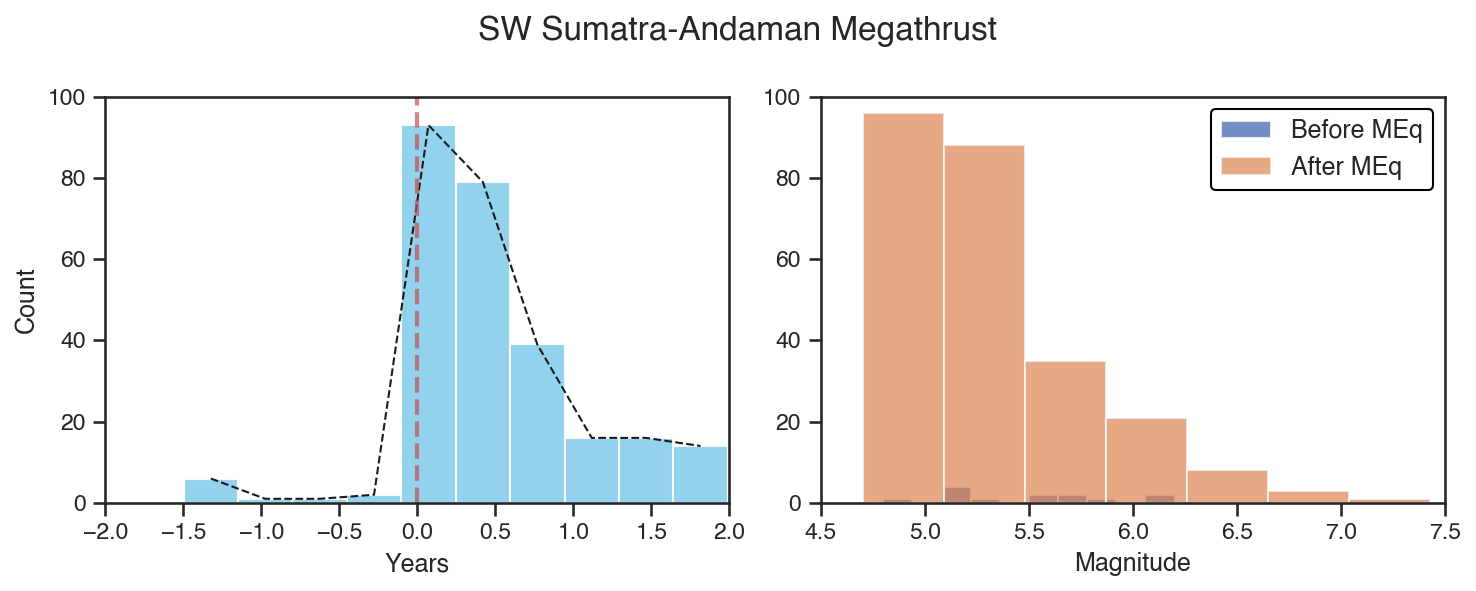

In [1598]:
data_dgoing = data.loc[data['CLASS'] == 'MTHRUST']
data_dgoing = data_dgoing[(data_dgoing['LAT'] <= 15) & (data_dgoing['LAT'] > -1)]
# data_dgoing = data_dgoing[(data_dgoing['DEPTH'] < 70)]
# data_dgoing = data_dgoing[(data_dgoing['YEARS'] < 1) & (data_dgoing['YEARS'] > -1)]
data_dgoing = data_dgoing[(data_dgoing['YEARS'] < 2) & (data_dgoing['YEARS'] > -2)]

figsize = (10,4)
dpi=150
width = 1

fig, ax = plt.subplots(1, 2, dpi=dpi, figsize = figsize, sharex= False)
fig1=ax[0]
fig2=ax[1]

# Plot left figure
year = data_dgoing.YEARS

n, bins, _ = fig1.hist(year, bins=10, color='skyblue', alpha=0.9)

# Compute the middle points of each bin and plot the line that joins them
bin_centers = (bins[1:] + bins[:-1]) / 2
fig1.plot(bin_centers, n, 'k--', lw=1)
fig1.set_xlabel('Years')
fig1.set_ylabel('Count')

fig1.axvline(x= 0, color="r", lw=2, ls='--', alpha=0.7) #2004 MEq
# fig1.axvline(x=2.8, color='green', lw=2, ls='--', alpha=0.7) #2005 MEq

#####################################################

# Plot right figure

# before_eq = data_dgoing[(data_dgoing['YEARS'] < 0) & (data_dgoing['YEARS'] > -1)]
# after_eq = data_dgoing[(data_dgoing['YEARS'] > 0) & (data_dgoing['YEARS'] < 1)]

before_eq = data_dgoing[(data_dgoing['YEARS'] < 0) & (data_dgoing['YEARS'] > -2)]
after_eq = data_dgoing[(data_dgoing['YEARS'] > 0) & (data_dgoing['YEARS'] < 2)]

# before_eq = data_dgoing[(data_dgoing['YEARS'] < 0) & (data_dgoing['YEARS'] > -3)]
# after_eq = data_dgoing[(data_dgoing['YEARS'] > 0) & (data_dgoing['YEARS'] < 3)]

before_eq = before_eq.MW
after_eq = after_eq.MW

# Plot earthquake magnitude data
fig2.hist(before_eq, alpha=0.8, label='Before MEq')
fig2.hist(after_eq, alpha=0.7, label='After MEq')

fig2.set_xlabel('Magnitude')
# fig2.set_ylabel('Count')
fig2.legend(loc = 'upper right',
            fontsize = 12,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=1)

fig.suptitle('SW Sumatra-Andaman Megathrust', fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.9)


fig1.set_xlim([-2, 2])
fig2.set_xlim([4.5, 7.5])

fig1.set_ylim([0, 100])
fig2.set_ylim([0, 100])

plt.tight_layout()

plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/hist/ANDSumMT.png"
            , dpi = 500, transparent= True, bbox_inches='tight')

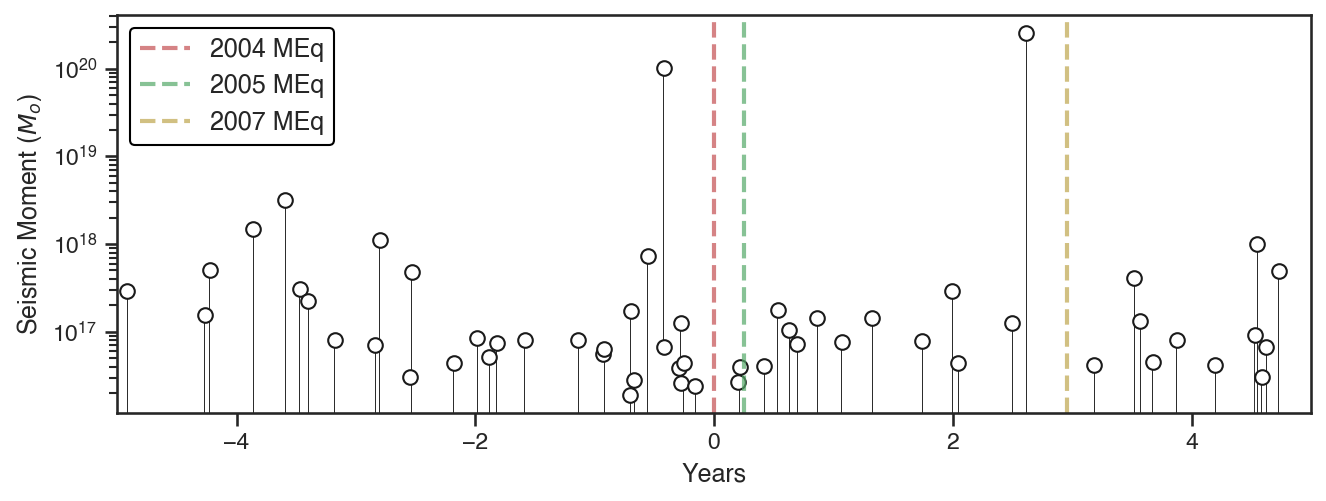

In [1599]:
data_dgoing = data.loc[data['CLASS'] == 'DGOING']
data_dgoing = data_dgoing[(data_dgoing['LAT'] <= -2) & (data_dgoing['LON'] <= 120)
                                       & (data_dgoing['DEPTH'] > 70)
                                       & (data_dgoing['YEARS'] < 5) & (data_dgoing['YEARS'] > -5)]

mt_exp = np.asarray(data_dgoing['EX'])
mt_mo = np.asarray(data_dgoing['MO'])
mt_time = np.asarray(data_dgoing['YEARS'])
mt_energy = mt_mo*np.power(10., mt_exp)
# mt_energy_cum = np.cumsum(mt_energy)

figsize = (9,3.5)
dpi=150
width = 1

fig, ax = plt.subplots(1, dpi=dpi, figsize = figsize, sharex= False)
fig1=ax
# fig2=ax[1]

x =data_dgoing['YEARS']
y = mt_energy

# # Apply a Gaussian filter to smooth the data
# from scipy.ndimage import gaussian_filter
# sigma = 2
# y_smooth = gaussian_filter(y, sigma)


fig1.bar(x, y, color='k', width=0.025)
fig1.plot(x, y, 'o', color='k', markersize = 7, markerfacecolor = 'white')

fig1.set_yscale('log')

fig1.set_xlabel('Years')
fig1.set_ylabel(r'Seismic Moment ($M_o$)')
# fig1.set_title('Long Slab (> 70 km)')

# fig.suptitle('Long Slab (> 70 km)', fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.9)

fig1.axvline(x= 0, color="r", lw=2, ls='--', alpha=0.7, label='2004 MEq') #2004 MEq
fig1.axvline(x= 0.252502, color="g", lw=2, ls='--', alpha=0.7, label='2005 MEq') #2005 MEq
fig1.axvline(x= 2.953983, color="y", lw=2, ls='--', alpha=0.9, label='2007 MEq') #2007 MEq

fig1.legend(loc = 'upper left',
            fontsize = 12,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=1)

fig1.set_xlim([-5, 5])
# fig1.set_ylim([0, 8.5])

plt.tight_layout()

# plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/hist/years_Mo_long_deep.png"
#             , dpi = 500, transparent= True, bbox_inches='tight')

## Sumatra upper plate

In [1600]:
data_upper = data.loc[data['CLASS'] == 'UPPER']
# data_upper = data_upper[(data_upper['TYPE'] == 'THRUST') & (data_upper['TYPE'] == 'O_THRUST')]

data_upper = data_upper[(data_upper['LAT'] <= 6) & (data_upper['LAT'] > -2) &
                         (data_upper['YEARS'] < 5) & (data_upper['YEARS'] > -5)]

# calculate seismic moment by thrust events

data_thrust = data_upper[(data_upper['TYPE'] == 'THRUST') | (data_upper['TYPE'] == 'O_THRUST')]

mt_exp_thrust = np.asarray(data_thrust['EX'])
mt_mo_thrust = np.asarray(data_thrust['MO'])
mt_time_thrust = np.asarray(data_thrust['YEARS'])
mt_energy_thrust = mt_mo_thrust*np.power(10., mt_exp_thrust)
# mt_energy_cum = np.cumsum(mt_energy)

# calculate seismic moment by normal events

data_normal = data_upper[(data_upper['TYPE'] == 'NORM') | (data_upper['TYPE'] == 'O_NORM')]

mt_exp_normal = np.asarray(data_normal['EX'])
mt_mo_normal = np.asarray(data_normal['MO'])
mt_time_normal = np.asarray(data_normal['YEARS'])
mt_energy_normal = mt_mo_normal*np.power(10., mt_exp_normal)
# mt_energy_cum = np.cumsum(mt_energy)

# calculate seismic moment by strike slip events

data_ss = data_upper[(data_upper['TYPE'] == 'SS')]

mt_exp_ss = np.asarray(data_ss['EX'])
mt_mo_ss = np.asarray(data_ss['MO'])
mt_time_ss = np.asarray(data_ss['YEARS'])
mt_energy_ss = mt_mo_ss*np.power(10., mt_exp_ss)
# mt_energy_cum = np.cumsum(mt_energy)

# data_odd = data_upper[(data_upper['TYPE'] == 'ODD')]

# mt_exp_ss = np.asarray(data_ss['EX'])
# mt_mo_ss = np.asarray(data_ss['MO'])
# mt_time_ss = np.asarray(data_ss['YEARS'])
# mt_energy_ss = mt_mo_ss*np.power(10., mt_exp_ss)
# # mt_energy_cum = np.cumsum(mt_energy)

In [1601]:
# Group the thrust earthquakes by year and count the number of earthquakes on each date
thrust_upper = data_thrust.groupby('YEARS').size()
# Normalize the thrust earthquake counts by dividing by the total number of earthquakes
normalized_thrust_upper = thrust_upper / thrust_upper.sum()

# Group the normal earthquakes by year and count the number of earthquakes on each date
normal_upper = data_normal.groupby('YEARS').size()
# Normalize the normal earthquake counts by dividing by the total number of earthquakes
normalized_normal_upper = normal_upper / normal_upper.sum()

# Group the ss earthquakes by year and count the number of earthquakes on each date
ss_upper = data_ss.groupby('YEARS').size()
# Normalize the ss earthquake counts by dividing by the total number of earthquakes
normalized_ss_upper = ss_upper / ss_upper.sum()

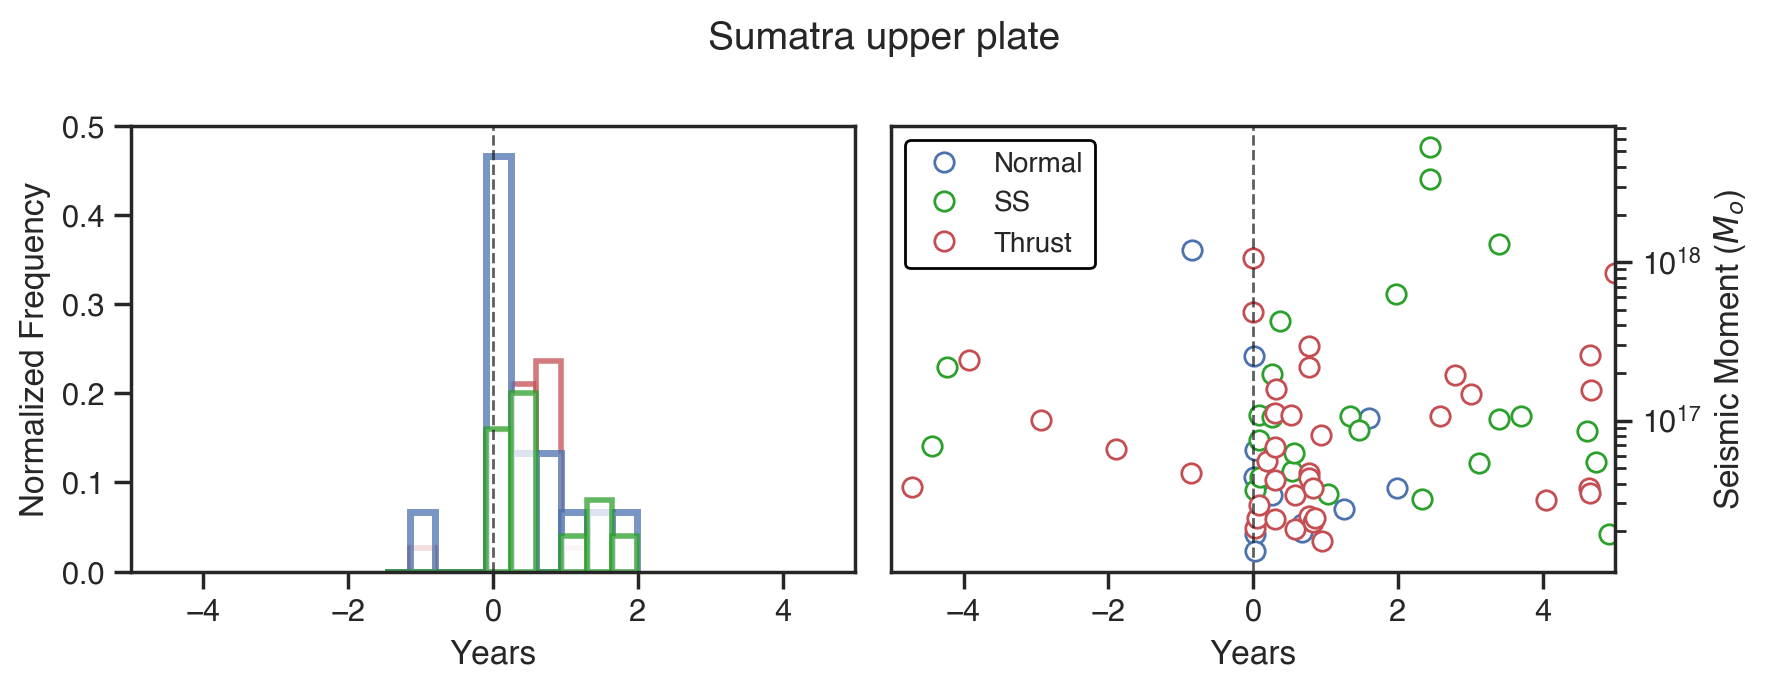

In [1602]:
# figsize = (8, 4)
dpi=200
width = 1

fig, ax = plt.subplots(1,2, dpi=dpi, figsize = figsize, sharex= False)

fig1=ax[0]
fig2=ax[1]
# fig3=ax[1, 0]
# fig4=ax[1, 1]

# Plot the top figure (years vs count)
# bins = 10
alpha = 0.75

# plot thrust
fig1.hist(normalized_thrust_upper.index, bins=bins, weights=normalized_thrust_upper.values, edgecolor='r',
         color= 'white', lw=2, alpha=alpha, label='Thrust')

# plot normal earthquake
fig1.hist(normalized_normal_upper.index, bins=bins, weights=normalized_normal_upper.values,
          edgecolor='b', lw=2.5, alpha=alpha, color='white', label='Normal')


# plot strike slip
fig1.hist(normalized_ss_upper.index, bins=bins, weights=normalized_ss_upper.values, edgecolor='tab:green',
         color='white', lw=2, alpha=alpha, label='SS')

# fig1.legend(loc = 'upper left',
#             fontsize = 10,
#             facecolor="white",
#             framealpha=1,
#             edgecolor="black",
#             markerscale=1)

fig1.set_xlabel('Years')
fig1.set_ylabel('Normalized Frequency')

fig1.set_xlim([-5, 5])
fig1.set_ylim([0, 0.5])

fig1.axvline(x= 0, color="k", lw=1, ls='--', alpha=0.7) #2004 MEq

###################################

# Plot the bottom figure (years vs Mo)


# fig2 = ax[1, 0]

x1 = data_thrust['YEARS']
y1 = mt_energy_thrust

x2 = data_normal['YEARS']
y2 = mt_energy_normal

x3 = data_ss['YEARS']
y3 = mt_energy_ss

# # Apply a Gaussian filter to smooth the data
# from scipy.ndimage import gaussian_filter
# sigma = 2
# y_smooth = gaussian_filter(y, sigma)


# fig2.bar(x2, y2, color='b', width=0.03)
fig2.plot(x2, y2, 'o', color='b', markersize = 7, markerfacecolor = 'white', label='Normal')

# fig2.bar(x3, y3, color='tab:green', width=0.03)
fig2.plot(x3, y3, 'o', color='tab:green', markersize = 7, markerfacecolor = 'white', label='SS')

# fig2.bar(x1, y1, color='r', width=0.03)
fig2.plot(x1, y1, 'o', color='r', markersize = 7, markerfacecolor = 'white', label='Thrust')

fig2.set_yscale('log')

fig2.yaxis.tick_right()
fig2.yaxis.set_label_position("right")

fig2.set_xlabel('Years')
fig2.set_ylabel(r'Seismic Moment ($M_o$)')

fig2.axvline(x= 0, color="k", lw=1, ls='--', alpha=0.7) #2004 MEq

fig2.legend(loc = 'upper left',
            fontsize = 10,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=1)

fig2.set_xlim([-5, 5])


fig.suptitle('Sumatra upper plate', fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.92)

plt.tight_layout()

# plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/hist/years_count_Mo_SUM_upper.png"
#             , dpi = 500, transparent= True, bbox_inches='tight')

## Long slab > 70 km

In [1603]:
data_dgoing = data.loc[data['CLASS'] == 'DGOING']
# data_dgoing = data_dgoing[(data_dgoing['TYPE'] == 'THRUST') & (data_dgoing['TYPE'] == 'O_THRUST')]

data_dgoing = data_dgoing[(data_dgoing['LAT'] < -2) &
                          (data_dgoing['DEPTH'] >= 70) &
                         (data_dgoing['YEARS'] < 5) & (data_dgoing['YEARS'] > -5)]

In [1604]:
# calculate seismic moment by thrust events

data_dgoing_thrust = data_dgoing[(data_dgoing['TYPE'] == 'THRUST') | (data_dgoing['TYPE'] == 'O_THRUST')]

dgoing_exp_thrust = np.asarray(data_dgoing_thrust['EX'])
dgoing_mo_thrust = np.asarray(data_dgoing_thrust['MO'])
dgoing_time_thrust = np.asarray(data_dgoing_thrust['YEARS'])
dgoing_energy_thrust = dgoing_mo_thrust*np.power(10., dgoing_exp_thrust)
# dgoing_energy_cum = np.cumsum(dgoing_energy)

# calculate seismic moment by normal events

data_dgoing_normal = data_dgoing[(data_dgoing['TYPE'] == 'NORM') | (data_dgoing['TYPE'] == 'O_NORM')]

dgoing_exp_normal = np.asarray(data_dgoing_normal['EX'])
dgoing_mo_normal = np.asarray(data_dgoing_normal['MO'])
dgoing_time_normal = np.asarray(data_dgoing_normal['YEARS'])
dgoing_energy_normal = dgoing_mo_normal*np.power(10., dgoing_exp_normal)
# dgoing_energy_cum = np.cumsum(dgoing_energy)

# calculate seismic moment by strike slip events

data_dgoing_ss = data_dgoing[(data_dgoing['TYPE'] == 'SS')]

dgoing_exp_ss = np.asarray(data_dgoing_ss['EX'])
dgoing_mo_ss = np.asarray(data_dgoing_ss['MO'])
dgoing_time_ss = np.asarray(data_dgoing_ss['YEARS'])
dgoing_energy_ss = dgoing_mo_ss*np.power(10., dgoing_exp_ss)
# dgoing_energy_cum = np.cumsum(dgoing_energy)

data_dgoing_odd = data_dgoing[(data_dgoing['TYPE'] == 'ODD')]

dgoing_exp_odd = np.asarray(data_dgoing_odd['EX'])
dgoing_mo_odd = np.asarray(data_dgoing_odd['MO'])
dgoing_time_odd = np.asarray(data_dgoing_odd['YEARS'])
dgoing_energy_odd = dgoing_mo_odd*np.power(10., dgoing_exp_odd)
# dgoing_energy_cum = np.cumsum(dgoing_energy)

In [1605]:
# Group the thrust earthquakes by year and count the number of earthquakes on each date
count_thrust_dgoing = data_dgoing_thrust.groupby('YEARS').size()
# Normalize the thrust earthquake counts by dividing by the total number of earthquakes
normalized_thrust_dgoing = count_thrust_dgoing / count_thrust_dgoing.sum()

# Group the normal earthquakes by year and count the number of earthquakes on each date
count_normal_dgoing = data_dgoing_normal.groupby('YEARS').size()
# Normalize the normal earthquake counts by dividing by the total number of earthquakes
normalized_normal_dgoing = count_normal_dgoing / count_normal_dgoing.sum()

# Group the ss earthquakes by year and count the number of earthquakes on each date
count_ss_dgoing = data_dgoing_ss.groupby('YEARS').size()
# Normalize the ss earthquake counts by dividing by the total number of earthquakes
normalized_ss_dgoing = count_ss_dgoing / count_ss_dgoing.sum()

# Group the ss earthquakes by year and count the number of earthquakes on each date
count_odd_dgoing = data_dgoing_ss.groupby('YEARS').size()
# Normalize the ss earthquake counts by dividing by the total number of earthquakes
normalized_odd_dgoing = count_odd_dgoing / count_odd_dgoing.sum()

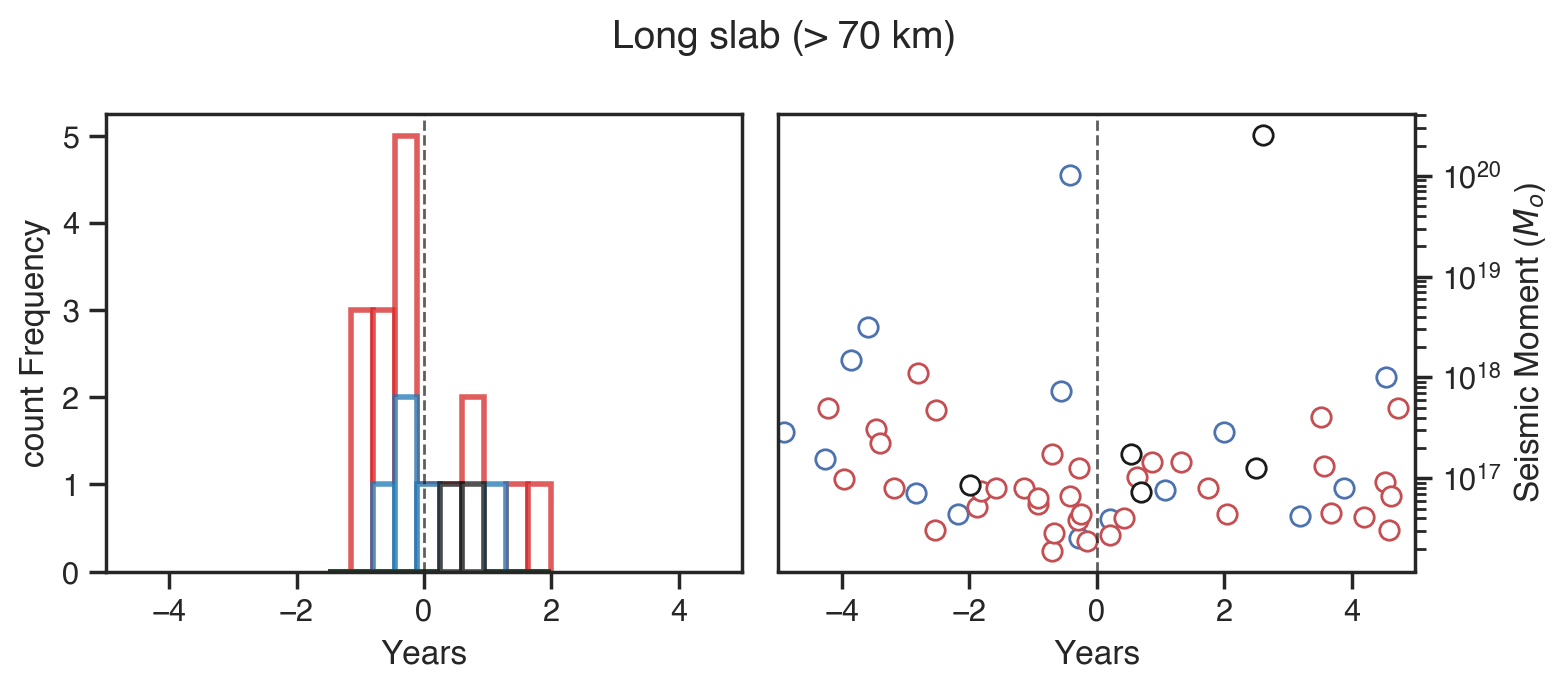

In [1606]:
figsize = (8, 3.5)
dpi=200
width = 1

fig, ax = plt.subplots(1,2, dpi=dpi, figsize = figsize, sharex= False)

fig1=ax[0]
fig2=ax[1]
# fig3=ax[1, 0]
# fig4=ax[1, 1]

x1 = data_dgoing_thrust['YEARS']
y1 = dgoing_energy_thrust

x2 = data_dgoing_normal['YEARS']
y2 = dgoing_energy_normal

x3 = data_dgoing_ss['YEARS']
y3 = dgoing_energy_ss

x4 = data_dgoing_odd['YEARS']
y4 = dgoing_energy_odd


# Plot the top figure (years vs count)
# bins = 10
alpha = 0.75

# # plot thrust
# fig1.hist(count_thrust_dgoing.index, bins=bins, weights=count_thrust_dgoing.values, edgecolor='r',
#          color= 'white', lw=2, alpha=alpha, label='Thrust')

# # plot normal earthquake
# fig1.hist(count_normal_dgoing.index, bins=bins, weights=count_normal_dgoing.values,
#           edgecolor='b', lw=2.5, alpha=alpha, color='white', label='Normal')


# # plot strike slip
# fig1.hist(count_ss_dgoing.index, bins=bins, weights=count_ss_dgoing.values, edgecolor='tab:green',
#          color='white', lw=2, alpha=alpha, label='SS')

fig1.hist(x1, bins=bins, edgecolor='tab:red',
         color='white', lw=2, alpha=alpha, label='Thrust')

fig1.hist(x2, bins=bins, edgecolor='tab:blue',
         color='white', lw=2, alpha=alpha, label='Normal')

fig1.hist(x3, bins=bins, edgecolor='tab:green',
         color='white', lw=2, alpha=alpha, label='SS')

fig1.hist(x4, bins=bins, edgecolor='k',
         color='white', lw=2, alpha=alpha, label='ODD')


# fig1.legend(loc = 'dgoing left',
#             fontsize = 10,
#             facecolor="white",
#             framealpha=1,
#             edgecolor="black",
#             markerscale=1)

fig1.set_xlabel('Years')
fig1.set_ylabel('count Frequency')

fig1.set_xlim([-5, 5])
# fig1.set_ylim([0, 0.5])

fig1.axvline(x= 0, color="k", lw=1, ls='--', alpha=0.7) #2004 MEq

###################################

# Plot the bottom figure (years vs Mo)


# fig2 = ax[1, 0]

# x1 = data_dgoing_thrust['YEARS']
# y1 = dgoing_energy_thrust

# x2 = data_dgoing_normal['YEARS']
# y2 = dgoing_energy_normal

# x3 = data_dgoing_ss['YEARS']
# y3 = dgoing_energy_ss


# fig2.bar(x2, y2, color='b', width=0.03)
fig2.plot(x2, y2, 'o', color='b', markersize = 7, markerfacecolor = 'white', label='Normal')

# fig2.bar(x3, y3, color='tab:green', width=0.03)
fig2.plot(x3, y3, 'o', color='tab:green', markersize = 7, markerfacecolor = 'white', label='SS')

# fig2.bar(x1, y1, color='r', width=0.03)
fig2.plot(x1, y1, 'o', color='r', markersize = 7, markerfacecolor = 'white', label='Thrust')

fig2.plot(x4, y4, 'o', color='k', markersize = 7, markerfacecolor = 'white', label='ODD')

fig2.set_yscale('log')

fig2.yaxis.tick_right()
fig2.yaxis.set_label_position("right")

fig2.set_xlabel('Years')
fig2.set_ylabel(r'Seismic Moment ($M_o$)')

fig2.axvline(x= 0, color="k", lw=1, ls='--', alpha=0.7) #2004 MEq

# fig2.legend(loc = 'dgoing left',
#             fontsize = 10,
#             facecolor="white",
#             framealpha=1,
#             edgecolor="black",
#             markerscale=1)

fig2.set_xlim([-5, 5])


fig.suptitle('Long slab (> 70 km)', fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.92)

plt.tight_layout()

# plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/hist/years_count_Mo_SUM_dgoing.png"
#             , dpi = 500, transparent= True, bbox_inches='tight')